# Programming Exercise 2: Logistic Regression

## Introduction

Trong bài tập này, bạn sẽ thực hiện hồi quy logistic và áp dụng nó cho hai tập dữ liệu khác nhau. Trước khi bắt đầu bài tập lập trình, chúng tôi đặc biệt khuyên bạn nên xem video bài giảng và hoàn thành các câu hỏi ôn tập cho các chủ đề liên quan.

Tất cả thông tin bạn cần để giải bài tập này đều có trong sổ ghi chép này và tất cả mã bạn sẽ thực hiện sẽ diễn ra trong sổ ghi chép này. Bài tập có thể được nộp ngay cho học viên chấm khóa học trực tiếp từ sổ ghi chép này (mã và hướng dẫn được bao gồm bên dưới).

Before we begin with the exercises, we need to import all libraries required for this programming exercise. Throughout the course, we will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, and [`matplotlib`](https://matplotlib.org/) for plotting. In this assignment, we will also use [`scipy`](https://docs.scipy.org/doc/scipy/reference/), which contains scientific and numerical computation functions and tools. 

You can find instructions on how to install required libraries in the README file in the [github repository](https://github.com/dibgerge/ml-coursera-python-assignments).

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# library written for this exercise providing additional functions for assignment submission, and others
import utils

# define the submission/grader object for this exercise
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Submission and Grading


After completing each part of the assignment, be sure to submit your solutions to the grader. The following is a breakdown of how each part of this exercise is scored.


| Section | Part                                 | Submission function   | Points 
| :-      |:-                                    | :-                    | :-:
| 1       | [Sigmoid Function](#section1)                   | [`sigmoid`](#sigmoid) | 5      
| 2       | [Compute cost for logistic regression](#section2) | [`costFunction`](#costFunction) | 30     
| 3       | [Gradient for logistic regression](#section2)     | [`costFunction`](#costFunction) | 30     
| 4       | [Predict Function](#section4)                     | [`predict`](#predict) | 5      
| 5       | [Compute cost for regularized LR](#section5)      | [`costFunctionReg`](#costFunctionReg) | 15     
| 6       | [Gradient for regularized LR](#section5)          | [`costFunctionReg`](#costFunctionReg) | 15     
|         | Total Points                         | | 100    



You are allowed to submit your solutions multiple times, and we will take only the highest score into consideration.

<div class="alert alert-block alert-warning">
At the end of each section in this notebook, we have a cell which contains code for submitting the solutions thus far to the grader. Execute the cell to see your score up to the current section. For all your work to be submitted properly, you must execute those cells at least once. They must also be re-executed everytime the submitted function is updated.
</div>


## 1 Logistic Regression

Trong phần này của bài tập, bạn sẽ xây dựng một mô hình hồi quy logistic để dự đoán liệu một sinh viên có được nhận vào một trường đại học hay không. Giả sử rằng bạn là quản trị viên của một khoa đại học và
bạn muốn xác định cơ hội nhập học của mỗi ứng viên dựa trên kết quả của họ trong hai kỳ thi. Bạn có dữ liệu lịch sử từ những người đăng ký trước đó mà bạn có thể sử dụng làm tập hợp đào tạo cho hồi quy hậu cần. Đối với mỗi ví dụ đào tạo, bạn có điểm của người đăng ký trong hai kỳ thi và điểm tuyển sinh
phán quyết. Nhiệm vụ của bạn là xây dựng một mô hình phân loại ước tính xác suất trúng tuyển của ứng viên dựa trên điểm số từ hai kỳ thi đó.

Ô sau sẽ tải dữ liệu và các nhãn tương ứng:

In [2]:
# Load data
# The first two columns contains the exam scores and the third column
# contains the label.
data = np.loadtxt(os.path.join('Data', 'ex2data1.txt'), delimiter=',')
X, y = data[:, 0:2], data[:, 2]

### 1.1 Visualizing the data

Trước khi bắt đầu triển khai bất kỳ thuật toán học nào, bạn nên hình dung dữ liệu nếu có thể. Chúng tôi hiển thị dữ liệu trên một biểu đồ 2 chiều bằng cách gọi hàm `plotData`. Bây giờ bạn sẽ hoàn thành mã trong `plotData` để nó hiển thị một hình trong đó các trục là hai điểm thi, và các ví dụ tích cực và tiêu cực được hiển thị bằng các điểm đánh dấu khác nhau.

Để giúp bạn làm quen hơn với việc vẽ sơ đồ, chúng tôi đã để trống `dữ liệu âm mưu` để bạn có thể thử tự thực hiện. Tuy nhiên, đây là một bài tập không bắt buộc (chưa phân loại). Chúng tôi cũng cung cấp cách triển khai của chúng tôi bên dưới để bạn có thể sao chép hoặc tham khảo. Nếu bạn chọn sao chép ví dụ của chúng tôi, hãy đảm bảo rằng bạn biết từng lệnh của nó đang làm gì bằng cách tham khảo tài liệu `matplotlib` và` numpy`.

```python
# Find Indices of Positive and Negative Examples
pos = y == 1
neg = y == 0

# Plot Examples
pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
```

In [3]:
def plotData(X, y):
    """
    Plots the data points X and y into a new figure. Plots the data 
    points with * for the positive examples and o for the negative examples.
    
    Parameters
    ----------
    X : array_like
        An Mx2 matrix representing the dataset. 
    
    y : array_like
        Label values for the dataset. A vector of size (M, ).
    
    Instructions
    ------------
    Plot the positive and negative examples on a 2D plot, using the
    option 'k*' for the positive examples and 'ko' for the negative examples.    
    """
    # Create New Figure
    fig = pyplot.figure()

    # ====================== YOUR CODE HERE ======================

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
    
    # ============================================================

Now, we call the implemented function to display the loaded data:

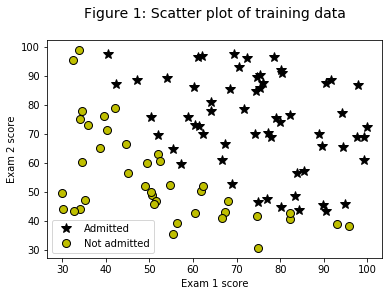

In [4]:
plotData(X, y)
# add axes labels
pyplot.xlabel('Exam 1 score')
pyplot.ylabel('Exam 2 score')
pyplot.title('Figure 1: Scatter plot of training data\n', fontsize = 14)
pyplot.legend(['Admitted', 'Not admitted'])
pyplot.show()

<a id="section1"></a>
### 1.2 Implementation

#### 1.2.1 Warmup exercise: sigmoid function

Trước khi bạn bắt đầu với hàm chi phí thực tế, hãy nhớ lại rằng giả thuyết hồi quy logistic được định nghĩa là:

$$ h_\theta(x) = g(\theta^T x)$$

> **_Note:_** Chúng tôi sẽ triển khai tất cả mã của mình bằng cách sử dụng vectơ hóa, vì vậy họ có thể xử lý toàn bộ tập huấn luyện mà không cần sử dụng `for loop` và nó sẽ làm cho mã của chúng tôi nhanh và hiệu quả hơn và tổng quát hóa !!!. Để viết mã vectơ hóa, chúng ta cần lập phương trình trên thành dạng vectơ hóa. Giả thuyết hồi quy logistic được vector hóa: $$ h_θ(x) = g(Xθ) $$

trong đó hàm $ g $ là hàm sigmoid. Hàm sigmoid được định nghĩa là:

$$g(z) = \frac{1}{1+e^{-z}}$$.

Your first step is to implement this function `sigmoid` so it can be
called by the rest of your program. When you are finished, try testing a few
values by calling `sigmoid(x)` in a new cell. For large positive values of `x`, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating `sigmoid(0)` should give you exactly 0.5. Your code should also work with vectors and matrices. **For a matrix, your function should perform the sigmoid function on every element.**
<a id="sigmoid"></a>

In [5]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z.
    
    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector 
        or a 2-D matrix. 
    
    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
        
    Instructions
    ------------
    Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).
    """
    # convert input to a numpy array
    z = np.array(z)
    
    # You need to return the following variables correctly 
    g = np.zeros(z.shape)

    # ====================== YOUR CODE HERE ======================

    g = 1/(1 + np.exp(-z))

    # =============================================================
    return g

Ô sau đây đánh giá hàm sigmoid tại `z = 0`. Bạn sẽ nhận được giá trị là 0,5. Bạn cũng có thể thử các giá trị khác nhau cho `z` để thử nghiệm với hàm sigmoid.

In [6]:
# Test the implementation of sigmoid function here
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


Sau khi hoàn thành một phần của bài tập, bạn có thể gửi các giải pháp của mình để chấm điểm bằng cách thêm chức năng bạn đã sửa đổi vào đối tượng gửi, sau đó gửi chức năng của bạn đến Coursera để chấm điểm.

Kịch bản gửi sẽ nhắc bạn về e-mail đăng nhập và mã thông báo gửi. Bạn có thể lấy mã thông báo gửi từ trang web cho bài tập. Bạn được phép gửi các giải pháp của mình nhiều lần và chúng tôi sẽ chỉ xem xét điểm cao nhất.

Thực thi ô sau để phân loại lời giải của bạn cho phần đầu tiên của bài tập này.

*You should now submit your solutions.*

In [7]:
# appends the implemented function in part 1 to the grader object
grader[1] = sigmoid

# send the added functions to coursera grader for getting a grade on this part
grader.grade()


Submitting Solutions | Programming Exercise logistic-regression



Login (email address):  anwarcse.me@gmail.com
Token:  kD9Ai4R66cK11dXW


                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Sigmoid Function |   5 /   5 | Nice work!
                   Logistic Regression Cost |   0 /  30 | 
               Logistic Regression Gradient |   0 /  30 | 
                                    Predict |   0 /   5 | 
       Regularized Logistic Regression Cost |   0 /  15 | 
   Regularized Logistic Regression Gradient |   0 /  15 | 
                                  --------------------------------
                                            |   5 / 100 |  



<a id="section2"></a>
#### 1.2.2 Cost function and gradient

Bây giờ bạn sẽ triển khai hàm chi phí và độ dốc cho hồi quy logistic. Trước khi tiếp tục, chúng ta thêm thuật ngữ chặn vào X.

In [8]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

Now, complete the code for the function `costFunction` to return the cost and gradient. Recall that the cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

> **_NOTE:_** Vectorized cost function: $$ J(\theta) = -\frac{1}{m}\big(y^T log(h) + (1-y)^T log(1-h)\big) $$

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$
element (for $j = 0, 1, \cdots , n$) is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

> **_NOTE:_** Vectorized gradient: $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(h-y) $$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.
<a id="costFunction"></a>

In [9]:
def costFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression. 
    
    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).
    
    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : arra_like
        Labels for the input. This is a vector of shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the cost function. 
    
    grad : array_like
        A vector of shape (n+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
        
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to 
    the cost. Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    # ====================== YOUR CODE HERE ======================

    # Calculate h 
    h = sigmoid(np.dot(X, theta))
    
    # Compute cost function J
    J = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h)))
    
    # Compute gradient
    grad = (1/m) * (np.dot(X.T, (h-y)))
    
    # =============================================================
    return J, grad

Khi bạn hoàn tất, hãy gọi `costFunction` của bạn bằng cách sử dụng hai trường hợp thử nghiệm cho $ \ theta $ bằng cách thực thi ô tiếp theo.

In [10]:
# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[-0.1000, -12.0092, -11.2628]
Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]

Cost at test theta: 0.218
Expected cost (approx): 0.218

Gradient at test theta:
	[0.043, 2.566, 2.647]
Expected gradients (approx):
	[0.043, 2.566, 2.647]


*You should now submit your solutions.*

In [11]:
grader[2] = costFunction
grader[3] = costFunction
grader.grade()


Submitting Solutions | Programming Exercise logistic-regression



Use token from last successful submission (anwarcse.me@gmail.com)? (Y/n):  y


                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Sigmoid Function |   5 /   5 | Nice work!
                   Logistic Regression Cost |  30 /  30 | Nice work!
               Logistic Regression Gradient |  30 /  30 | Nice work!
                                    Predict |   0 /   5 | 
       Regularized Logistic Regression Cost |   0 /  15 | 
   Regularized Logistic Regression Gradient |   0 /  15 | 
                                  --------------------------------
                                            |  65 / 100 |  



#### 1.2.3 Learning parameters using `scipy.optimize`

Trong bài tập trước, bạn đã tìm thấy các tham số tối ưu của mô hình hồi quy tuyến tính bằng cách triển khai gradient descent. Bạn đã viết một hàm chi phí và tính toán độ dốc của nó, sau đó thực hiện một bước giảm độ dốc tương ứng. Lần này, thay vì thực hiện các bước giảm dần độ dốc, bạn sẽ sử dụng [`scipy.optimize` module] (https://docs.scipy.org/doc/scipy/reference/optimize.html). SciPy là một thư viện tính toán số cho `python`. Nó cung cấp một mô-đun tối ưu hóa để tìm kiếm và giảm thiểu root. Kể từ `scipy 1.0`, hàm` scipy.optimize.minimize` là phương pháp được sử dụng cho các vấn đề tối ưu hóa (cả có giới hạn và không bị giới hạn).

Đối với hồi quy logistic, bạn muốn tối ưu hóa hàm chi phí $J(\theta)$ với các tham số $\theta$.
Một cách cụ thể, bạn sẽ sử dụng `mize.minimize` để tìm các tham số tốt nhất $\theta$ cho hàm chi phí hồi quy logistic, đưa ra một cố định dữ liệu (của các giá trị X và y). Bạn sẽ vượt qua để `tối ưu hóa. Tối ưu hóa` các đầu vào sau:
- `costFunction`: Một hàm chi phí, khi được cung cấp tập huấn luyện và một $\theta$ cụ thể, sẽ tính toán chi phí hồi quy logistic và gradient liên quan đến $\theta$ cho tập dữ liệu (X, y). Điều quan trọng cần lưu ý là chúng ta chỉ truyền tên của hàm mà không có dấu ngoặc đơn. Điều này cho thấy rằng chúng tôi chỉ cung cấp một tham chiếu đến hàm này và không đánh giá kết quả từ hàm này.

- `initial_theta`: The initial values of the parameters we are trying to optimize.
- `(X, y)`: These are additional arguments to the cost function.
- `jac`: Chỉ báo nếu hàm chi phí trả về Jacobian (gradient) cùng với giá trị chi phí. (Thật)
- `method`: Optimization method/algorithm to use
- `options`: Các tùy chọn bổ sung có thể dành riêng cho phương pháp tối ưu hóa cụ thể. Trong phần sau, chúng tôi chỉ cho thuật toán biết số lần lặp tối đa trước khi nó kết thúc.

Nếu bạn đã hoàn thành đúng chức năng `costFunction`, thì `optimize.minimize` sẽ hội tụ các thông số tối ưu hóa phù hợp và trả về các giá trị cuối cùng của cost và $ \ theta $ trong một đối tượng lớp. Lưu ý rằng bằng cách sử dụng `optimize.minimize`, bạn không phải tự viết bất kỳ vòng lặp nào hoặc đặt tốc độ học tập giống như bạn đã làm đối với gradient descent. Tất cả điều này được thực hiện bởi `optimize.minimize`: bạn chỉ cần cung cấp một hàm tính toán chi phí và gradient.

Trong phần sau, chúng ta đã có mã được viết để gọi là `optimize.minimize` với các đối số chính xác.

In [12]:
# set options for optimize.minimize
options= {'maxiter': 400}

# see documention for scipy's optimize.minimize  for description about
# the different parameters
# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


Once `optimize.minimize` completes, we want to use the final value for $\theta$ to visualize the decision boundary on the training data as shown in the figure below. 

![](Figures/decision_boundary1.png)

Để làm như vậy, chúng tôi đã viết một hàm `plotDecisionBoundary` để vẽ ranh giới quyết định trên đầu dữ liệu huấn luyện. Bạn không cần phải viết bất kỳ mã nào để vẽ ranh giới quyết định, nhưng chúng tôi cũng khuyến khích bạn xem mã trong `plotDecisionBoundary` để biết cách vẽ ranh giới như vậy bằng cách sử dụng các giá trị $ \theta $. Bạn có thể tìm thấy hàm này trong tệp `utils.py` đi kèm với bài tập này.

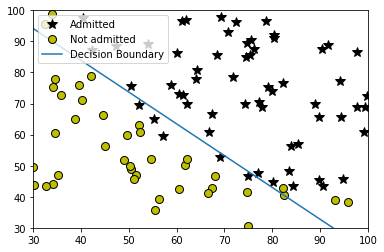

In [13]:
# Plot Boundary
utils.plotDecisionBoundary(plotData, theta, X, y)

<a id="section4"></a>
#### 1.2.4 Evaluating logistic regression

Sau khi tìm hiểu các thông số, bạn có thể sử dụng mô hình để dự đoán liệu một sinh viên cụ thể có được nhận hay không. Đối với một sinh viên có điểm Bài thi 1 là 45 và điểm Bài thi 2 là 85, bạn nên mong đợi xác suất nhập học là 0,776. Một cách khác để đánh giá chất lượng của các tham số mà chúng tôi đã tìm thấy là xem mô hình đã học dự đoán tốt như thế nào trên tập huấn luyện của chúng tôi. Ở phần này, nhiệm vụ của bạn là hoàn thành đoạn mã trong hàm `dự đoán`. Hàm dự đoán sẽ tạo ra các dự đoán “1” hoặc “0” với một tập dữ liệu và một vectơ tham số đã học được $\theta$.
<a id="predict"></a>

In [14]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)
    
    Parameters
    ----------
    theta : array_like
        Parameters for logistic regression. A vecotor of shape (n+1, ).
    
    X : array_like
        The data to use for computing predictions. The rows is the number 
        of points to compute predictions, and columns is the number of
        features.

    Returns
    -------
    p : array_like
        Predictions and 0 or 1 for each row in X. 
    
    Instructions
    ------------
    Complete the following code to make predictions using your learned 
    logistic regression parameters.You should set p to a vector of 0's and 1's    
    """
    m = X.shape[0] # Number of training examples

    # You need to return the following variables correctly
    p = np.zeros(m)

    # ====================== YOUR CODE HERE ======================

    pred = sigmoid(np.dot(X, theta))
    for i in range(m):
        if pred[i] >= 0.5:
            p[i] = 1
        else:
            p[i] = 0
    
    # ============================================================
    return p

Sau khi bạn đã hoàn thành mã trong `dự đoán`, chúng tôi sẽ tiến hành báo cáo độ chính xác đào tạo của trình phân loại của bạn bằng cách tính toán tỷ lệ phần trăm các ví dụ mà trình phân loại đó chính xác.

In [15]:
#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
prob = sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')

For a student with scores 45 and 85,we predict an admission probability of 0.776
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.00 %
Expected accuracy (approx): 89.00 %


*You should now submit your solutions.*

In [16]:
grader[4] = predict
grader.grade()


Submitting Solutions | Programming Exercise logistic-regression



Use token from last successful submission (anwarcse.me@gmail.com)? (Y/n):  y


                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Sigmoid Function |   5 /   5 | Nice work!
                   Logistic Regression Cost |  30 /  30 | Nice work!
               Logistic Regression Gradient |  30 /  30 | Nice work!
                                    Predict |   5 /   5 | Nice work!
       Regularized Logistic Regression Cost |   0 /  15 | 
   Regularized Logistic Regression Gradient |   0 /  15 | 
                                  --------------------------------
                                            |  70 / 100 |  



## 2 Regularized logistic regression

Trong phần này của bài tập, bạn sẽ thực hiện hồi quy logistic chính quy để dự đoán liệu các vi mạch từ một nhà máy chế tạo có vượt qua đảm bảo chất lượng (QA) hay không. Trong quá trình QA, mỗi vi mạch sẽ trải qua các bài kiểm tra khác nhau để đảm bảo nó hoạt động chính xác.
Giả sử bạn là giám đốc sản phẩm của nhà máy và bạn có kết quả kiểm tra một số vi mạch trong hai lần kiểm tra khác nhau. Từ hai bài kiểm tra này, bạn muốn xác định liệu các vi mạch nên được chấp nhận hay bị từ chối. Để giúp bạn đưa ra quyết định, bạn có một tập dữ liệu về kết quả kiểm tra trên các vi mạch trong quá khứ, từ đó bạn có thể xây dựng mô hình hồi quy logistic.

Đầu tiên, chúng tôi tải dữ liệu từ tệp CSV:

In [17]:
# Load Data
# The first two columns contains the X values and the third column
# contains the label (y).
data = np.loadtxt(os.path.join('Data', 'ex2data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]

### 2.1 Visualize the data

Tương tự như các phần trước của bài tập này, `plotData` được sử dụng để tạo một hình, trong đó các trục là hai điểm kiểm tra và các ví dụ dương (y = 1, được chấp nhận) và tiêu cực (y = 0, bị từ chối) được hiển thị với các điểm đánh dấu khác nhau.

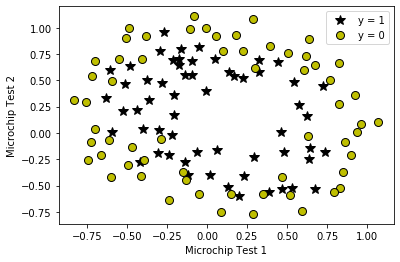

In [18]:
plotData(X, y)
# Labels and Legend
pyplot.xlabel('Microchip Test 1')
pyplot.ylabel('Microchip Test 2')

# Specified in plot order
pyplot.legend(['y = 1', 'y = 0'], loc='upper right')
pyplot.show()

Hình trên cho thấy rằng tập dữ liệu của chúng ta không thể được phân tách thành các ví dụ tích cực và tiêu cực bằng một đường thẳng xuyên qua biểu đồ. Do đó, một ứng dụng thẳng của hồi quy logistic sẽ không hoạt động tốt trên tập dữ liệu này vì hồi quy logistic sẽ chỉ có thể tìm thấy ranh giới quyết định tuyến tính.

### 2.2 Feature mapping

Một cách để phù hợp với dữ liệu hơn là tạo nhiều tính năng hơn từ mỗi điểm dữ liệu. Trong hàm `mapFeature`, chúng tôi sẽ ánh xạ các đối tượng thành tất cả các số hạng đa thức của $ x_1 $ và $ x_2 $ cho đến lũy thừa thứ sáu.

$$ \text{mapFeature}(x) = \begin{bmatrix} 1 & x_1 & x_2 & x_1^2 & x_1 x_2 & x_2^2 & x_1^3 & \dots & x_1 x_2^5 & x_2^6 \end{bmatrix}^T $$

Kết quả của việc ánh xạ này, vectơ của hai đối tượng địa lý (điểm trong hai bài kiểm tra QA) của chúng tôi đã được chuyển đổi thành một vectơ 28 chiều. Một bộ phân loại hồi quy logistic được đào tạo trên vectơ đặc trưng có chiều cao hơn này sẽ có ranh giới quyết định phức tạp hơn và sẽ xuất hiện phi tuyến tính khi được vẽ trong biểu đồ 2 chiều của chúng tôi.
Mặc dù ánh xạ tính năng cho phép chúng tôi xây dựng một bộ phân loại biểu cảm hơn, nhưng nó cũng dễ bị trang bị quá mức. Trong các phần tiếp theo của bài tập, bạn sẽ thực hiện hồi quy logistic chính quy để phù hợp với dữ liệu và cũng tự mình xem việc chính quy hóa có thể giúp chống lại vấn đề trang bị quá mức như thế nào.


In [19]:
def mapFeature(X1, X2):
    """
    Maps the two input features to quadratic features used in the regularization exercise.

    Returns a new feature array with more features, comprising of
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

    Parameters
    ----------
    X1 : array_like
        A vector of shape (m, 1), containing one feature for all examples.

    X2 : array_like
        A vector of shape (m, 1), containing a second feature for all examples.
        
        Inputs X1, X2 must be the same size.

    degree: int, optional
        The polynomial degree.

    Returns
    -------
    : array_like
        A matrix of of m rows, and columns depend on the degree of polynomial.
    """
    degree = 6
    out = np.ones(X.shape[0])[:, np.newaxis]
    for i in range(1, degree+1):
        for j in range(0, i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))[:, np.newaxis]))
    return out

In [20]:
# Note that mapFeature also adds a column of ones for us, so the intercept term is included
X = mapFeature(X[:, 0], X[:, 1])

# Setup the data matrix appropriately
m, n = X.shape
y = y[:, np.newaxis] # Convert label (y) from 1D array to 2D array of shape (m, 1)

<a id="section5"></a>
### 2.3 Cost function and gradient

Bây giờ bạn sẽ triển khai mã để tính toán hàm chi phí và độ dốc cho hồi quy logistic chính quy. Hoàn thành mã cho hàm `costFunctionReg` dưới đây để trả về chi phí và độ dốc.

Nhớ lại rằng hàm chi phí chính quy trong hồi quy logistic là

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)}\log \left( h_\theta \left(x^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - h_\theta \left( x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

> **_NOTE:_** Vectorized cost function: $$ J(\theta) = -\frac{1}{m}\big(y^T log(h) + (1-y)^T log(1-h)\big) + \frac{\lambda}{2m}\theta_j^T \theta_j $$

Note that you should not regularize the parameters $\theta_0$. The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \qquad \text{for } j =0 $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \qquad \text{for } j \ge 1 $$

> **_NOTE:_** Vectorized form:
$$ \frac{\delta J(\theta)}{\delta\theta_{0}} = \frac{1}{m} X^T(h-y) \qquad \text{for } j =0 $$
$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(h-y) + \frac{\lambda}{m}\theta_j \qquad \text{for } j \ge 1 $$

<a id="costFunctionReg"></a>

In [27]:
def costFunctionReg(theta, X, y, lambda_):
    """
    Compute cost and gradient for logistic regression with regularization.
    
    Parameters
    ----------
    theta : array_like
        Logistic regression parameters. A vector with shape (n, ). n is 
        the number of features including any intercept. If we have mapped
        our initial features into polynomial features, then n is the total 
        number of polynomial features. 
    
    X : array_like
        The data set with shape (m x n). m is the number of examples, and
        n is the number of features (after feature mapping).
    
    y : array_like
        The data labels. A vector with shape (m, ).
    
    lambda_ : float
        The regularization parameter. 
    
    Returns
    -------
    J : float
        The computed value for the regularized cost function. 
    
    grad : array_like
        A vector of shape (n, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    
    Instructions
    ------------
    Compute the cost `J` of a particular choice of theta.
    Compute the partial derivatives and set `grad` to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples
    n = theta.size

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    # ===================== YOUR CODE HERE ======================

    # Compute h
    h = sigmoid(np.dot(X, theta))
    
    # Compute J
    J = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h))) + (lambda_/(2*m)) * (np.dot(theta[1:].T, theta[1:]))
    
    # Compute grad for j = 0
    grad[0] = (1/m) * (np.dot(X[:, 0].T, h-y))
    
    # Compute grad for j >= 1
    for i in range(1, n):
        grad[i] = (1/m) * (np.dot(X[:, i].T, h-y)) + (lambda_/m) * (theta[i])
    
    # =============================================================
    return J, grad

Once you are done with the `costFunctionReg`, we call it below using the initial value of $\theta$ (initialized to all zeros), and also another test case where $\theta$ is all ones.

In [28]:
# Initialize fitting parameters
initial_theta = np.zeros((n, 1))

# Set regularization parameter lambda to 1
# DO NOT use `lambda` as a variable name in python
# because it is a python keyword
lambda_ = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X, y, lambda_)

print('Cost at initial theta (zeros): ', cost.flatten())
print('Expected cost (approx)       : 0.693\n')

print('Gradient at initial theta (zeros) - first five values only: ', grad[:5].flatten())
print('Expected gradients (approx) - first five values only:')
print('\t[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]\n')


# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones((n,1))
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('------------------------------\n')
print('Cost at test theta    :', cost.flatten())
print('Expected cost (approx): 3.16\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('Gradient at initial theta (zeros) - first five values only: ', grad[:5].flatten())
print('Expected gradients (approx) - first five values only:')
print('\t[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')

Cost at initial theta (zeros):  [0.69314718]
Expected cost (approx)       : 0.693

Gradient at initial theta (zeros) - first five values only:  [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]
Expected gradients (approx) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]

------------------------------

Cost at test theta    : [3.16450933]
Expected cost (approx): 3.16

Gradient at initial theta (zeros) - first five values only:
Gradient at initial theta (zeros) - first five values only:  [0.34604507 0.16135192 0.19479576 0.22686278 0.09218568]
Expected gradients (approx) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


*You should now submit your solutions.*

In [29]:
grader[5] = costFunctionReg
grader[6] = costFunctionReg
grader.grade()


Submitting Solutions | Programming Exercise logistic-regression



Use token from last successful submission (anwarcse.me@gmail.com)? (Y/n):  y


                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Sigmoid Function |   5 /   5 | Nice work!
                   Logistic Regression Cost |  30 /  30 | Nice work!
               Logistic Regression Gradient |  30 /  30 | Nice work!
                                    Predict |   5 /   5 | Nice work!
       Regularized Logistic Regression Cost |  15 /  15 | Nice work!
   Regularized Logistic Regression Gradient |  15 /  15 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  



#### 2.3.1 Learning parameters using `scipy.optimize.minimize`

Tương tự như các phần trước, bạn sẽ sử dụng `mize.minimize` để tìm hiểu các tham số tối ưu $ \theta $. Nếu bạn đã hoàn thành chi phí và độ dốc cho hồi quy logistic chính quy (`costFunctionReg`) một cách chính xác, bạn sẽ có thể chuyển qua phần tiếp theo của để tìm hiểu các tham số $ \theta $ bằng cách sử dụng `mize.minimize`.

In [30]:
# Initialize fitting parameters
initial_theta = np.zeros((n, 1))

# Set regularization parameter lambda to 1 (you should vary this)
lambda_ = 1
res = optimize.minimize(costFunctionReg,
                        initial_theta.flatten(),
                        (X, y.flatten(), lambda_),
                        jac=True,
                        method='TNC',
                        options={'maxiter': 3000})

# The fun property of OptimizeResult object returns the value of costFunctionReg at optimized theta
cost = res.fun

# The optimized theta is in the x property of the result
theta = res.x

print("Optimized theta: ", theta)
print("Cost: ", cost)

Optimized theta:  [ 1.27271027  0.62529965  1.18111686 -2.01987399 -0.91743189 -1.43166929
  0.12393227 -0.36553118 -0.35725403 -0.17516291 -1.45817009 -0.05098418
 -0.61558553 -0.27469165 -1.19271298 -0.24217841 -0.20603298 -0.04466178
 -0.27778951 -0.29539513 -0.45645981 -1.04319155  0.02779373 -0.29244871
  0.0155576  -0.32742406 -0.1438915  -0.92467487]
Cost:  0.529002729964499


### 2.4 Plotting the decision boundary

Để giúp bạn hình dung mô hình được học bởi bộ phân loại này, chúng tôi đã cung cấp hàm `plotDecisionBoundary` vẽ ranh giới quyết định (phi tuyến tính) phân tách các ví dụ tích cực và tiêu cực. Trong `plotDecisionBoundary`, chúng tôi vẽ ranh giới quyết định phi tuyến tính bằng cách tính toán các dự đoán của trình phân loại trên một lưới có khoảng cách đều nhau và sau đó vẽ một biểu đồ đường bao trong đó các dự đoán thay đổi từ y = 0 thành y = 1.

### 2.5 Optional (ungraded) exercises

Trong phần này của bài tập, bạn sẽ phải thử các thông số chính quy hóa khác nhau cho tập dữ liệu để hiểu cách chính quy hóa ngăn chặn việc trang bị quá mức.

Lưu ý những thay đổi trong ranh giới quyết định khi bạn thay đổi $ \lambda $. Với một nhỏ $ \lambda $, bạn sẽ thấy rằng trình phân loại gần như đúng mọi ví dụ huấn luyện, nhưng lại vẽ ra một ranh giới rất phức tạp, do đó làm quá tải dữ liệu. Xem các số liệu sau để biết ranh giới quyết định mà bạn sẽ nhận được cho các giá trị khác nhau của $ \lambda $. 

<table>
    <tr>
        <td style="text-align:center">
            No regularization (overfitting)<img src="Figures/decision_boundary3.png">
        </td>        
        <td style="text-align:center">
            Decision boundary with regularization
            <img src="Figures/decision_boundary2.png">
        </td>
        <td style="text-align:center">
            Decision boundary with too much regularization
            <img src="Figures/decision_boundary4.png">
        </td>        
    <tr>
</table>

Đây không phải là một ranh giới quyết định tốt: ví dụ: nó dự đoán rằng một điểm tại $ x=(−0,25,1,5) $ được chấp nhận $ (y=1) $, có vẻ là một quyết định không chính xác đối với tập huấn luyện.
Với $ \lambda$ lớn hơn, bạn sẽ thấy một biểu đồ thể hiện ranh giới quyết định đơn giản hơn mà vẫn phân tách khá rõ ràng những mặt tích cực và tiêu cực. Tuy nhiên, nếu $ \lambda $ được đặt thành một giá trị quá cao, bạn sẽ không phù hợp và ranh giới quyết định sẽ không tuân theo dữ liệu quá tốt, do đó làm thiếu dữ liệu.

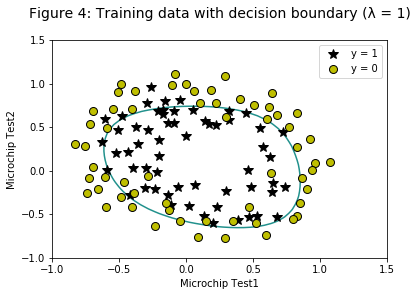

In [31]:
def plotDecisionBoundary(theta, X, y):
    """
    Plots the data points X and y into a new figure with the decision boundary defined by theta.
    Plots the data points with + for the positive examples and o for  the negative examples.

    Parameters
    ----------

    theta : array_like
        Parameters for logistic regression. A vector of shape (n+1, ).

    X : array_like
        The input dataset. X is assumed to be  a either:
            1) Mx3 matrix, where the first column is an all ones column for the intercept.
            2) MxN, N>3 matrix, where the first column is all ones.

    y : array_like
        Vector of data labels of shape (m, 1).
    """
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u), len(v)))
    
    def mapFeaturePlot(X1, X2):
        degree = 6
        out = np.ones(1)
        for i in range(1, degree+1):
            for j in range(0, i+1):
                out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
        return out
    
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = np.dot(mapFeaturePlot(u[i], v[j]), theta)
    
    pos = y.flatten() == 1
    neg = y.flatten() == 0
    X = data[:, 0:2]
    
    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
       
    pyplot.contour(u,v,z,0)
    pyplot.title('Figure 4: Training data with decision boundary (λ = 1)\n', fontsize = 14)
    pyplot.xlabel('Microchip Test1')
    pyplot.ylabel('Microchip Test2')
    pyplot.legend(['y = 1', 'y = 0'], loc='upper right')

plotDecisionBoundary(theta, X, y)

In [32]:
# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: %.1f %%' % (np.mean(p == y.flatten()) * 100))
print('Expected accuracy (with lambda = 1): 83.1 % (approx)\n')

Train Accuracy: 83.1 %
Expected accuracy (with lambda = 1): 83.1 % (approx)



*You do not need to submit any solutions for these optional (ungraded) exercises.*